In [8]:
!pip install BRScraper

In [9]:
from BRScraper import nba
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
import numpy as np

In [10]:
# Week 1: Data Collection, Exploration and some Cleaning

# running this will show you what metrics are available for each player and their meaning
player_metrics = [
    "Player",  # Name of the player
    "Age",  # Player's age
    "Team",  # Abbreviation of the team the player belongs to
    "Pos (Position)",  # Player's position on the court (e.g., PG, SG, PF)
    "G (Games Played)",  # Number of games played
    "GS (Games Started)",  # Number of games started
    "MP (Minutes Played)",  # Average minutes played per game
    "FG (Field Goals Made)",  # Average field goals made per game
    "FGA (Field Goals Attempted)",  # Average field goal attempts per game
    "FG% (Field Goal Percentage)",  # Percentage of successful field goals
    "3P (Three-Point Field Goals Made)",  # Average three-pointers made per game
    "3PA (Three-Point Field Goals Attempted)",  # Average three-point attempts per game
    "3P% (Three-Point Percentage)",  # Percentage of successful three-pointers
    "2P (Two-Point Field Goals Made)",  # Average two-pointers made per game
    "2PA (Two-Point Field Goals Attempted)",  # Average two-point attempts per game
    "2P% (Two-Point Percentage)",  # Percentage of successful two-pointers
    "eFG% (Effective Field Goal Percentage)",  # Adjusted FG% accounting for 3P being worth more than 2P
    "FT (Free Throws Made)",  # Average free throws made per game
    "FTA (Free Throws Attempted)",  # Average free throw attempts per game
    "FT% (Free Throw Percentage)",  # Percentage of successful free throws
    "ORB (Offensive Rebounds)",  # Average offensive rebounds per game
    "DRB (Defensive Rebounds)",  # Average defensive rebounds per game
    "TRB (Total Rebounds)",  # Average total rebounds per game (ORB + DRB)
    "AST (Assists)",  # Average assists per game
    "STL (Steals)",  # Average steals per game
    "BLK (Blocks)",  # Average blocks per game
    "TOV (Turnovers)",  # Average turnovers per game
    "PF (Personal Fouls)",  # Average personal fouls per game
    "PTS (Points)",  # Average points scored per game
    "Awards (Awards and Rankings)",  # Achievements, awards, and rankings (e.g., MVP-1, AS)
    "Season (Season Year)",  # The season the stats belong to (e.g., 2022-23)
]

for metric in player_metrics:
    print(metric)

Player
Age
Team
Pos (Position)
G (Games Played)
GS (Games Started)
MP (Minutes Played)
FG (Field Goals Made)
FGA (Field Goals Attempted)
FG% (Field Goal Percentage)
3P (Three-Point Field Goals Made)
3PA (Three-Point Field Goals Attempted)
3P% (Three-Point Percentage)
2P (Two-Point Field Goals Made)
2PA (Two-Point Field Goals Attempted)
2P% (Two-Point Percentage)
eFG% (Effective Field Goal Percentage)
FT (Free Throws Made)
FTA (Free Throws Attempted)
FT% (Free Throw Percentage)
ORB (Offensive Rebounds)
DRB (Defensive Rebounds)
TRB (Total Rebounds)
AST (Assists)
STL (Steals)
BLK (Blocks)
TOV (Turnovers)
PF (Personal Fouls)
PTS (Points)
Awards (Awards and Rankings)
Season (Season Year)


In [11]:
df = nba.get_stats(season=2024, info='per_game', playoffs=False)

print(df.columns)

# checking and handling missing values if neccessary
df.isnull().sum()

print(df.duplicated().sum()) # output is 0, no duplicates were found as expected

print(df.describe())

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards',
       'Season'],
      dtype='object')
0
              Age           G          GS          MP          FG         FGA  \
count  735.000000  735.000000  735.000000  735.000000  735.000000  735.000000   
mean    26.155102   40.880272   18.440816   18.264762    2.972789    6.423401   
std      4.371745   25.581293   25.024108    9.735524    2.356999    4.783384   
min     19.000000    1.000000    0.000000    0.500000    0.000000    0.000000   
25%     23.000000   17.000000    0.000000   10.600000    1.300000    3.000000   
50%     25.000000   41.000000    5.000000   17.200000    2.300000    5.000000   
75%     29.000000   64.500000   29.000000   26.450000    4.150000    8.700000   
max     39.000000   84.000000   82.000000   37.800000   11.500000   23.600000   

In [12]:
# All awards and nominations that can be given to a player during and after the season
awards = {
    'MVP': 'Most Valuable Player',
    'DPOY': 'Defensive Player of the Year',
    'CPOY': 'Comeback Player of the Year',
    'AS': 'All-Star',
    'NBA1': 'All-NBA First Team',
    'NBA2': 'All-NBA Second Team',
    'NBA3': 'All-NBA Third Team',
}

for award in awards:
    print(award)

# for any awards that have a hyphen and a # after (e.g., MVP-6) tells us the player's rank in the voting for that awards in that given season.
# So if a player has MVP-1, they ranked in 1st place and won MVP for that season, if a player has MVP-6, they ranked 6th in MVP voting.

MVP
DPOY
CPOY
AS
NBA1
NBA2
NBA3


In [13]:
print(df.head(20)) # getting all metrics/averages for players during the 2023-24 regular season, for the first

                     Player   Age Team Pos     G    GS    MP    FG   FGA  \
0               Joel Embiid  29.0  PHI   C  39.0  39.0  33.6  11.5  21.8   
1               Luka Dončić  24.0  DAL  PG  70.0  70.0  37.5  11.5  23.6   
2     Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  35.2  11.5  18.8   
3   Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  34.0  10.6  19.8   
4             Jalen Brunson  27.0  NYK  PG  77.0  77.0  35.4  10.3  21.4   
5              Devin Booker  27.0  PHO  PG  68.0  68.0  36.0   9.4  19.2   
6              Kevin Durant  35.0  PHO  PF  75.0  75.0  37.2  10.0  19.1   
7              Jayson Tatum  25.0  BOS  PF  74.0  74.0  35.7   9.1  19.3   
8              De'Aaron Fox  26.0  SAC  PG  74.0  74.0  35.9   9.7  20.9   
9          Donovan Mitchell  27.0  CLE  SG  55.0  55.0  35.3   9.1  19.8   
10            Stephen Curry  35.0  GSW  PG  74.0  74.0  32.7   8.8  19.5   
11             Nikola Jokić  28.0  DEN   C  79.0  79.0  34.6  10.4  17.9   
12          

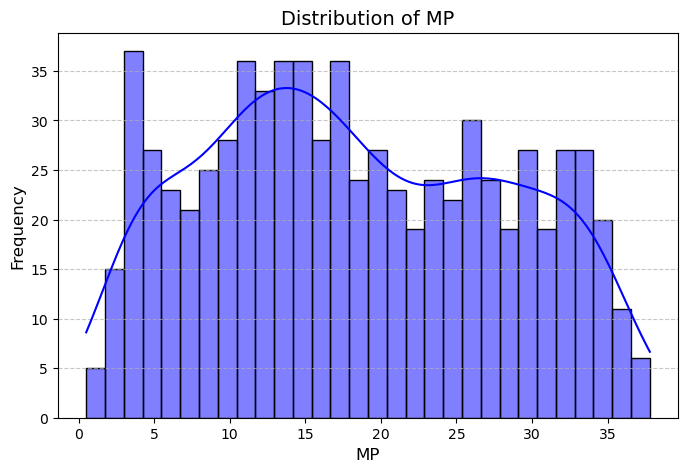

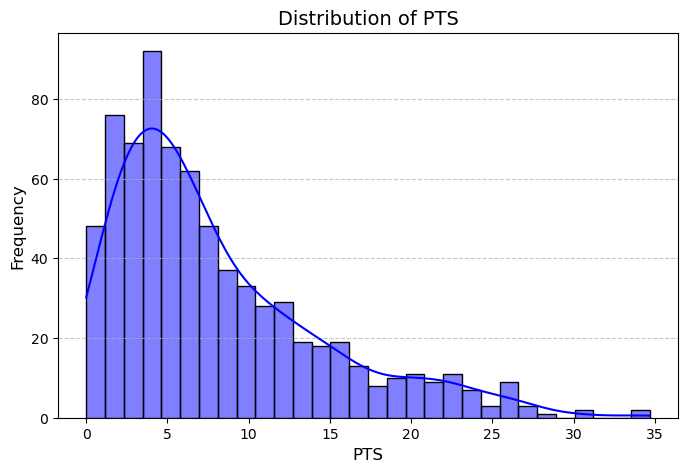

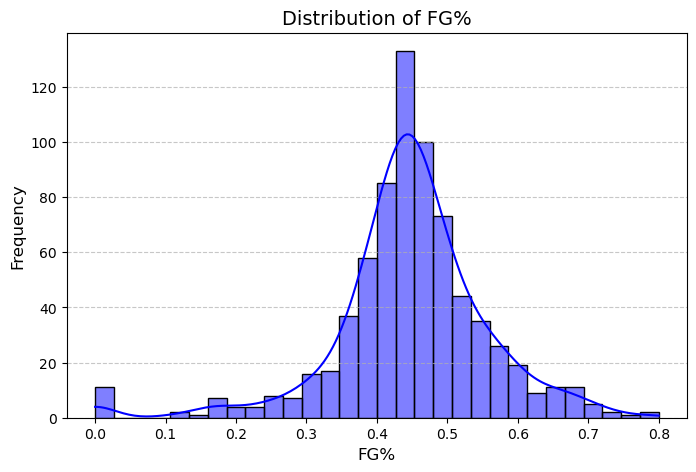

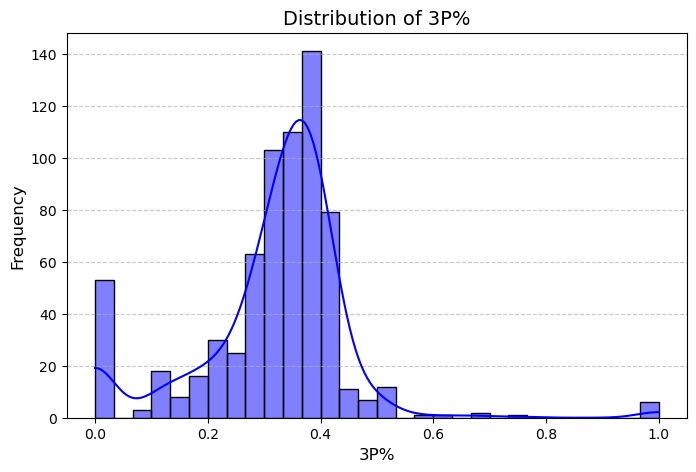

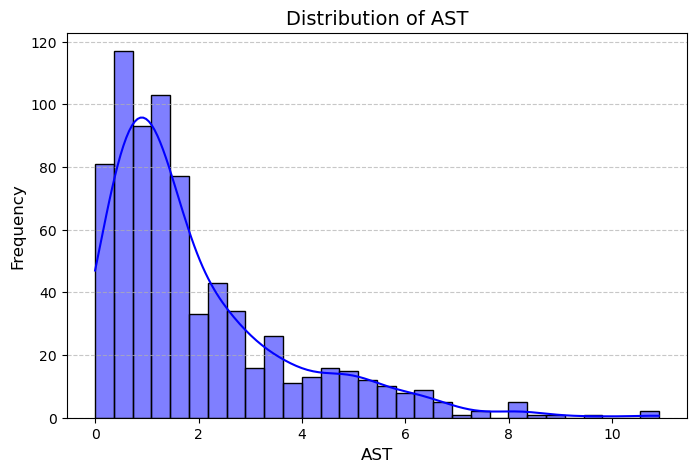

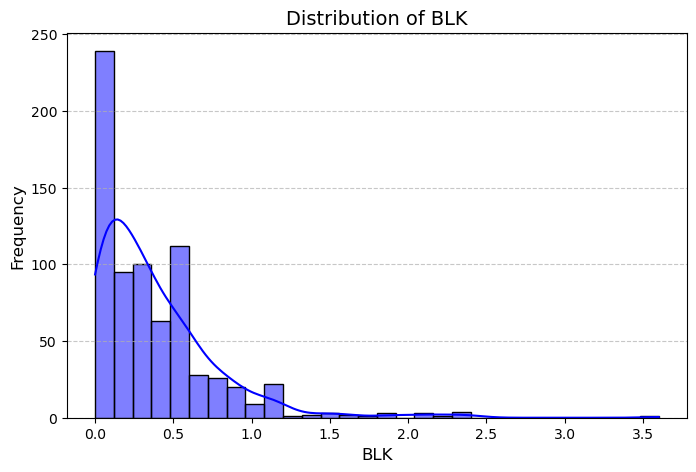

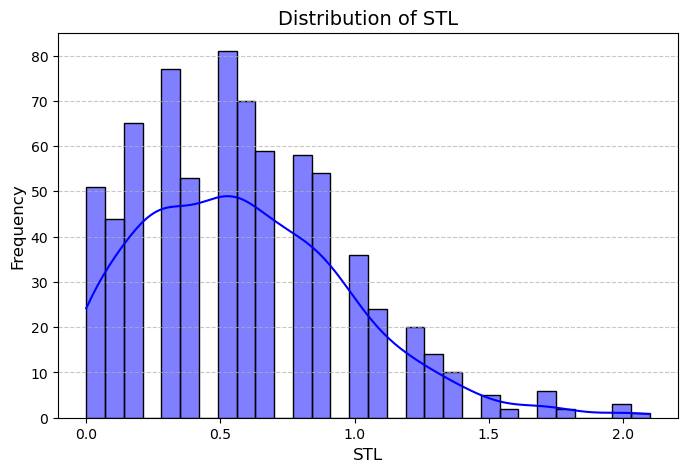

In [14]:
#getting the distributions for different metricsw for the 2023-2024 season

df.head()
metrics = ["MP", "PTS", "FG%", "3P%", "AST", "BLK", "STL"]  # Add more columns if needed

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[metric], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Distribution of {metric}", fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Some observations for the distributions above (For the 2023-24 regular season )

MP (Minutes Played)
Evenly distributed - I see that most players are spread out in when it comes to the average minutes they played per game. Which makes sense when we consider that different players on a team will have varied playing times becuase of their role. 

PTS (Points Scored)
Skewed left - Most players in this season seemed to have score relatively few points per game. A smaller number of players (usually stars) seem to makeup most of the scoring load.


FG% (Field Goal Percentage)
Bell curve with a peak at ~45% - Shooting efficiency varied widely, with most players falling around the league average of ~45%. Tells us most players in the league this season scored pretty effecientlly. We can expect players with great scoring ability, or centers who mainly take close shots to be in the right tail end of the range.


3P% (Three-Point Percentage)
Bell curve skewed slightly left, peak at ~40% - Majority of players had around 30–40% for three-point shooting. 


AST (Assists)
kewed left, peak at ~1 assist per game - Most players averaged only a few assists per game, this is a harder stat to achieve.


BLK (Blocks)
Skewed left, peak below 1 block per game - Blocking shots is a specialized skill often dominated by big men. Which means not all players can achieve this, and then on top of that, not all big men are great at blocking; another stat that is hard to come by.


STL (Steals)
Left-skewed, peak below 1 steal per game - Steals are also a specialized skill that most players rarely achieve. 

In [16]:
# General info from NBA history
df = nba.get_general_info()
print(df)

     Season   Lg               Champion        MVP Rookie of the Year  \
0   2024-25  NBA                    NaN        NaN                NaN   
1   2023-24  NBA         Boston Celtics   N. Jokić      V. Wembanyama   
2   2022-23  NBA         Denver Nuggets  J. Embiid        P. Banchero   
3   2021-22  NBA  Golden State Warriors   N. Jokić          S. Barnes   
4   2020-21  NBA        Milwaukee Bucks   N. Jokić            L. Ball   
..      ...  ...                    ...        ...                ...   
83  1950-51  NBA       Rochester Royals        NaN          P. Arizin   
84  1949-50  NBA     Minneapolis Lakers        NaN           A. Groza   
85  1948-49  BAA     Minneapolis Lakers        NaN         H. Shannon   
86  1947-48  BAA      Baltimore Bullets        NaN         P. Hoffman   
87  1946-47  BAA  Philadelphia Warriors        NaN                NaN   

                         Points           Rebounds              Assists  \
0   S. Gilgeous-Alexander (599)     I. Zubac (27

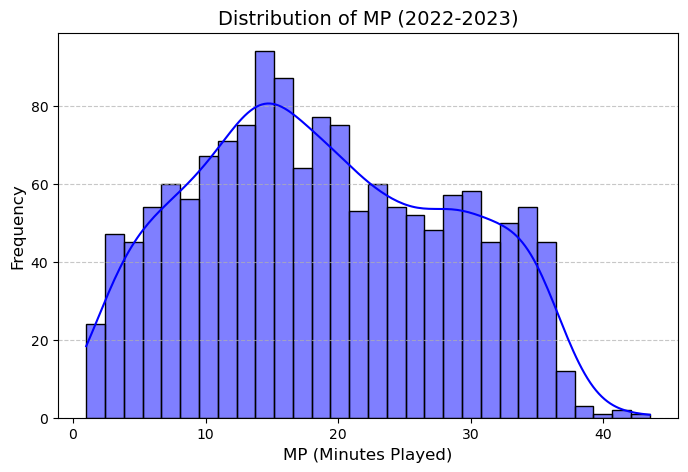

In [17]:
# here i got the distribution for MP (minutes played) from 2022 to 2023. (adjusting the range further than like 10 years is prone to a 429 error - too many requests).
# reference used: https://matplotlib.org/stable/api/index.html
start_season = 2022
end_season = 2023
metric = "MP"
mp_data = []  # thiss list stores the MP values

for season in range(start_season, end_season + 1):
        df_season = nba.get_stats(season=season, info='per_game', playoffs=False) #getting the stats for a given season
        
        if metric in df_season.columns:
            mp_data.extend(df_season[metric].dropna().tolist()) # and then adding it to the list
        
        time.sleep(1.5) # I added this to help prevent being locked out of the API (429 error) - not reliable.

df_all_mp = pd.DataFrame(mp_data, columns=[metric]) # placing all the data from the list into a dataframe

plt.figure(figsize=(8, 5))
sns.histplot(df_all_mp[metric], kde=True, bins=30, color='blue', edgecolor='black')
plt.title(f"Distribution of {metric} (2022-2023)", fontsize=14)
plt.xlabel(f"{metric} (Minutes Played)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I was working on code to get the same distributions for these metrics, but accross a longer time period (1946-47 - 2023-14 season), the issue is that causes way too many requests to the library and I got locked out several times because of it. I tried to do what prof told us, which is to download all the data to my local machine and then manipulate the file - same issue occurs, in order to dowload the data, we would have to fetch all of necccsary information first to then compile it into a csv file.

In [19]:
# Get current season stats for all players
df = nba.get_stats(2023, info='per_game', playoffs=False, rename=False)

# Pick a team
team_name = 'BOS'

# Filter players for the team
team_players = df[df['Team'] == team_name]

# Select columns to display
columns_to_show = ['Player', 'Pos', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%']
total_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

# Display individual player stats
print(f"\nStats for all {team_name} players in 2023:")
print("-" * 50)
print(team_players[columns_to_show])

# Calculate team totals
print("\nTeam Totals Per Game:")
print("-" * 50)
team_totals = team_players[total_columns].sum()
print(team_totals)

# Shooting percentages
print("\nTeam Shooting Percentages:")
print("-" * 50)
shooting_columns = ['FG%', '3P%']
team_shooting = team_players[shooting_columns].mean()
print(team_shooting.round(3))


Stats for all BOS players in 2023:
--------------------------------------------------
                Player Pos     G    MP   PTS  TRB  AST  STL  BLK    FG%    3P%
5         Jayson Tatum  SF  74.0  36.9  30.1  8.8  4.6  1.1  0.7  0.466  0.350
16        Jaylen Brown  SF  67.0  35.9  26.6  6.9  3.5  1.1  0.4  0.491  0.335
110    Malcolm Brogdon  PG  67.0  26.0  14.9  4.2  3.7  0.7  0.3  0.484  0.444
154      Derrick White  SG  82.0  28.3  12.4  3.6  3.9  0.7  0.9  0.462  0.381
170       Marcus Smart  PG  61.0  32.1  11.5  3.1  6.3  1.5  0.4  0.415  0.336
224         Al Horford   C  63.0  30.5   9.8  6.2  3.0  0.5  1.0  0.476  0.446
294     Grant Williams  PF  79.0  25.9   8.1  4.6  1.7  0.5  0.4  0.454  0.395
298    Robert Williams   C  35.0  23.5   8.0  8.3  1.4  0.6  1.4  0.747  0.000
384         Sam Hauser  SF  80.0  16.1   6.4  2.6  0.9  0.4  0.3  0.455  0.418
405       Mike Muscala   C  20.0  16.2   5.9  3.4  0.6  0.2  0.3  0.472  0.385
427   Payton Pritchard  PG  48.0  13.4   5.6

In [20]:
# Get current season stats for all players
df = nba.get_stats(2023, info='per_game', playoffs=False, rename=False)

# Get LeBron's stats
lebron_stats = df[df['Player'] == 'LeBron James']

# Pick a team
team_name = 'BOS'

# Filter players for the team
team_players = df[df['Team'] == team_name]

# Find the player with highest points per game to replace
max_pts_player = team_players.loc[team_players['PTS'].idxmax()]
print(f"\nReplacing {max_pts_player['Player']} with LeBron James")

# Remove the highest scoring player
team_players = team_players[team_players['Player'] != max_pts_player['Player']]

# Add LeBron's stats with Boston team
lebron_stats_copy = lebron_stats.copy()
lebron_stats_copy['Team'] = team_name
team_players = pd.concat([team_players, lebron_stats_copy])

# Select columns to display
columns_to_show = ['Player', 'Pos', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%']
total_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

# Display individual player stats
print(f"\nStats for {team_name} players with LeBron James in 2023:")
print("-" * 50)
print(team_players[columns_to_show])

# Calculate team totals
print("\nNew Team Totals Per Game:")
print("-" * 50)
team_totals = team_players[total_columns].sum()
print(team_totals)

# Shooting percentages
print("\nNew Team Shooting Percentages:")
print("-" * 50)
shooting_columns = ['FG%', '3P%']
team_shooting = team_players[shooting_columns].mean()
print(team_shooting.round(3))

# Show the difference in team totals
print("\nChange in Team Averages after replacing with LeBron:")
print("-" * 50)
old_team = df[df['Team'] == team_name]
old_totals = old_team[total_columns].sum()
diff = team_totals - old_totals
print(diff.round(1))


Replacing Jayson Tatum with LeBron James

Stats for BOS players with LeBron James in 2023:
--------------------------------------------------
                Player Pos     G    MP   PTS  TRB  AST  STL  BLK    FG%    3P%
16        Jaylen Brown  SF  67.0  35.9  26.6  6.9  3.5  1.1  0.4  0.491  0.335
110    Malcolm Brogdon  PG  67.0  26.0  14.9  4.2  3.7  0.7  0.3  0.484  0.444
154      Derrick White  SG  82.0  28.3  12.4  3.6  3.9  0.7  0.9  0.462  0.381
170       Marcus Smart  PG  61.0  32.1  11.5  3.1  6.3  1.5  0.4  0.415  0.336
224         Al Horford   C  63.0  30.5   9.8  6.2  3.0  0.5  1.0  0.476  0.446
294     Grant Williams  PF  79.0  25.9   8.1  4.6  1.7  0.5  0.4  0.454  0.395
298    Robert Williams   C  35.0  23.5   8.0  8.3  1.4  0.6  1.4  0.747  0.000
384         Sam Hauser  SF  80.0  16.1   6.4  2.6  0.9  0.4  0.3  0.455  0.418
405       Mike Muscala   C  20.0  16.2   5.9  3.4  0.6  0.2  0.3  0.472  0.385
427   Payton Pritchard  PG  48.0  13.4   5.6  1.8  1.3  0.3  0.0  0

In [21]:
#Visualization with another players stats in place of the top players stats in a situation where the top player on a team is having a cold streak or a hot streak
#In this situation Lebron stats are worse than Tatum's so I replace it to show a possible short decline in Tatum's averages which can affect the outcome of our future prediction model.

In [31]:
df = nba.get_stats(2024, info='per_game', playoffs=False)

# Filter for players with 65+ games, then sort by blocks
top_blockers = df[df['G'] >= 65][['Player', 'Team', 'G', 'BLK']].sort_values('BLK', ascending=False).head(10)

print("\nTop 10 Shot Blockers (min. 65 games played) - 2023-24 Season")
print("==========================================================")
for _, player in top_blockers.iterrows():
    print(f"{player['Player']} ({player['Team']}) - {player['BLK']:.1f} BPG in {int(player['G'])} games")


Top 10 Shot Blockers (min. 65 games played) - 2023-24 Season
Victor Wembanyama (SAS) - 3.6 BPG in 71 games
Brook Lopez (MIL) - 2.4 BPG in 79 games
Chet Holmgren (OKC) - 2.3 BPG in 82 games
Anthony Davis (LAL) - 2.3 BPG in 76 games
Daniel Gafford (2TM) - 2.1 BPG in 74 games
Rudy Gobert (MIN) - 2.1 BPG in 76 games
Nic Claxton (BRK) - 2.1 BPG in 71 games
Myles Turner (IND) - 1.9 BPG in 77 games
Jaren Jackson Jr. (MEM) - 1.6 BPG in 66 games
Clint Capela (ATL) - 1.5 BPG in 73 games


In [29]:
df = nba.get_stats(2024, info='per_game', playoffs=False)

# Filter for players with 65+ games, then sort by steals
top_stealers = df[df['G'] >= 65][['Player', 'Team', 'G', 'STL']].sort_values('STL', ascending=False).head(10)

print("\nTop 10 Steal Leaders (min. 65 games played) - 2023-24 Season")
print("==========================================================")
for _, player in top_stealers.iterrows():
    print(f"{player['Player']} ({player['Team']}) - {player['STL']:.1f} SPG in {int(player['G'])} games")


Top 10 Steal Leaders (min. 65 games played) - 2023-24 Season
Shai Gilgeous-Alexander (OKC) - 2.0 SPG in 75 games
De'Aaron Fox (SAC) - 2.0 SPG in 74 games
Matisse Thybulle (POR) - 1.7 SPG in 65 games
Alex Caruso (CHI) - 1.7 SPG in 71 games
Kawhi Leonard (LAC) - 1.6 SPG in 68 games
Paul George (LAC) - 1.5 SPG in 74 games
Luka Dončić (DAL) - 1.4 SPG in 70 games
Dejounte Murray (ATL) - 1.4 SPG in 78 games
Herbert Jones (NOP) - 1.4 SPG in 76 games
Jalen Suggs (ORL) - 1.4 SPG in 75 games


In [43]:
df = nba.get_stats(2024, info='per_game', playoffs=False)

# Create defensive metrics dataframe
defense_stats = df[['Player', 'Team', 'G', 'MP', 'STL', 'BLK']].copy()

# Filter for players with significant playing time (at least 20 minutes per game)
defense_stats = defense_stats[defense_stats['MP'] >= 20]

# Calculate stocks (steals + blocks)
defense_stats['STOCKS'] = defense_stats['STL'] + defense_stats['BLK']

# Sort by combined defensive stats
dpoy_candidates = defense_stats.sort_values('STOCKS', ascending=False).head(15)

print("\nDPOY Candidates 2023-24 Season")
print("==============================")
for _, player in dpoy_candidates.iterrows():
    print(f"{player['Player']} ({player['Team']}):")
    print(f"   Steals: {player['STL']:.1f} | Blocks: {player['BLK']:.1f} | Total Stocks: {player['STOCKS']:.1f}")
    print(f"   Games: {int(player['G'])} | Minutes: {player['MP']:.1f}")
    print("------------------------------")
#stocks is steals + blocks


DPOY Candidates 2023-24 Season
Victor Wembanyama (SAS):
   Steals: 1.2 | Blocks: 3.6 | Total Stocks: 4.8
   Games: 71 | Minutes: 29.7
------------------------------
Anthony Davis (LAL):
   Steals: 1.2 | Blocks: 2.3 | Total Stocks: 3.5
   Games: 76 | Minutes: 35.5
------------------------------
Daniel Gafford (WAS):
   Steals: 1.0 | Blocks: 2.2 | Total Stocks: 3.2
   Games: 45 | Minutes: 26.5
------------------------------
Daniel Gafford (2TM):
   Steals: 0.9 | Blocks: 2.1 | Total Stocks: 3.0
   Games: 74 | Minutes: 24.5
------------------------------
Joel Embiid (PHI):
   Steals: 1.2 | Blocks: 1.7 | Total Stocks: 2.9
   Games: 39 | Minutes: 33.6
------------------------------
Shai Gilgeous-Alexander (OKC):
   Steals: 2.0 | Blocks: 0.9 | Total Stocks: 2.9
   Games: 75 | Minutes: 34.0
------------------------------
Chet Holmgren (OKC):
   Steals: 0.6 | Blocks: 2.3 | Total Stocks: 2.9
   Games: 82 | Minutes: 29.4
------------------------------
Brook Lopez (MIL):
   Steals: 0.5 | Blocks: 

In [35]:
df = nba.get_stats(2025, info='per_game', playoffs=False)

# Sort by blocks per game and get top 10
top_blockers = df[['Player', 'Team', 'G', 'BLK']].sort_values('BLK', ascending=False).head(10)

print("\nTop 10 Shot Blockers - 2024-25 Season")
print("=====================================")
for _, player in top_blockers.iterrows():
    print(f"{player['Player']} ({player['Team']}) - {player['BLK']:.1f} BPG in {int(player['G'])} games")


Top 10 Shot Blockers - 2024-25 Season
Victor Wembanyama (SAS) - 3.5 BPG in 17 games
Walker Kessler (UTA) - 2.9 BPG in 14 games
Chet Holmgren (OKC) - 2.6 BPG in 10 games
Nick Richards (CHO) - 2.5 BPG in 6 games
Brook Lopez (MIL) - 2.4 BPG in 19 games
Donovan Clingan (POR) - 2.2 BPG in 17 games
Anthony Davis (LAL) - 2.0 BPG in 20 games
Myles Turner (IND) - 1.9 BPG in 19 games
Robert Williams (POR) - 1.9 BPG in 7 games
Alex Sarr (WAS) - 1.8 BPG in 18 games


In [37]:
df = nba.get_stats(2025, info='per_game', playoffs=False)

# Sort by steals per game and get top 10
top_stealers = df[['Player', 'Team', 'G', 'STL']].sort_values('STL', ascending=False).head(10)

print("\nTop 10 Steal Leaders - 2024-25 Season")
print("=====================================")
for _, player in top_stealers.iterrows():
    print(f"{player['Player']} ({player['Team']}) - {player['STL']:.1f} SPG in {int(player['G'])} games")


Top 10 Steal Leaders - 2024-25 Season
Dyson Daniels (ATL) - 3.1 SPG in 20 games
Dejounte Murray (NOP) - 2.4 SPG in 5 games
Jalen Williams (OKC) - 2.1 SPG in 20 games
Paul George (PHI) - 2.1 SPG in 9 games
Tari Eason (HOU) - 2.0 SPG in 21 games
Tyrese Maxey (PHI) - 2.0 SPG in 12 games
Oscar Tshiebwe (UTA) - 2.0 SPG in 1 games
Jordan Poole (WAS) - 1.9 SPG in 16 games
Franz Wagner (ORL) - 1.8 SPG in 22 games
Herbert Jones (NOP) - 1.8 SPG in 4 games
